In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cali_house_prices = pd.read_csv("data/california_housing_prices.csv")
cali_house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
cali_house_prices.drop(["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis=1, inplace=True)
cali_house_prices.rename(columns={
    "median_house_value": "value"
}, inplace=True)

# median_income is initially measured in 10s of thousands, convert to dollars
cali_house_prices["median_income"] = cali_house_prices["median_income"] * 10000

cali_house_prices

,median_income,value
0,83252.0,452600.0
1,83014.0,358500.0
2,72574.0,352100.0
3,56431.0,341300.0
4,38462.0,342200.0
...,...,...
20635,15603.0,78100.0
20636,25568.0,77100.0
20637,17000.0,92300.0
20638,18672.0,84700.0


In [4]:
us_re_interest_rates = pd.read_csv("data/us_real_estate_interest_rates.csv")
us_re_interest_rates.head(15)

,FEDFUNDS,Owner-Occupied-Home-Proportion,30-Year-Mortgage-Rate,Consumer-Price-Index,Year,Month,Quarter,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars,Year-Quarter-Month
0,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Double,88200.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
1,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Single,51400.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
2,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Total1,72000.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
3,0.07,64.9,4.432,235.288,2014,January,Q1,Northeast,Double,92600.0,22180.0,59210.0,71620.0,83720.0,101300.0,2014-Q1-January
4,0.07,64.9,4.432,235.288,2014,January,Q1,Northeast,Single,48700.0,22180.0,59210.0,71620.0,83720.0,101300.0,2014-Q1-January
5,0.07,64.9,4.432,235.288,2014,January,Q1,Northeast,Total1,72100.0,22180.0,59210.0,71620.0,83720.0,101300.0,2014-Q1-January
6,0.07,64.9,4.432,235.288,2014,January,Q1,South,Double,80700.0,47040.0,49660.0,60060.0,70990.0,85870.0,2014-Q1-January
7,0.07,64.9,4.432,235.288,2014,January,Q1,South,Single,46900.0,47040.0,49660.0,60060.0,70990.0,85870.0,2014-Q1-January
8,0.07,64.9,4.432,235.288,2014,January,Q1,South,Total1,63800.0,47040.0,49660.0,60060.0,70990.0,85870.0,2014-Q1-January
9,0.07,64.9,4.432,235.288,2014,January,Q1,United States,Double,84500.0,124600.0,53660.0,64900.0,75740.0,91610.0,2014-Q1-January


# Variable Distributions

<Axes: xlabel='FEDFUNDS', ylabel='Count'>

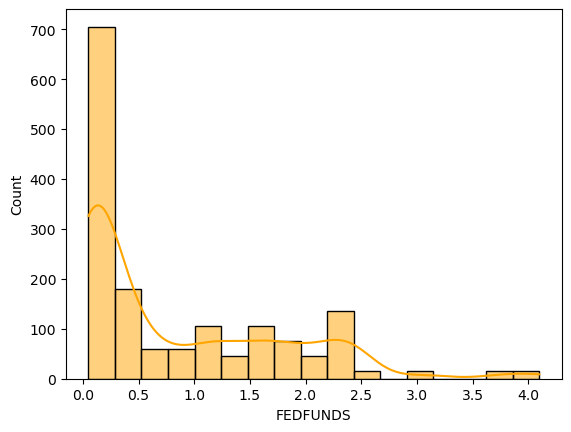

In [5]:
# Density of fed interest rate
sns.histplot(data=us_re_interest_rates, x="FEDFUNDS", kde=True, label="fed funds rate", color="orange")

<Axes: xlabel='30-Year-Mortgage-Rate', ylabel='Count'>

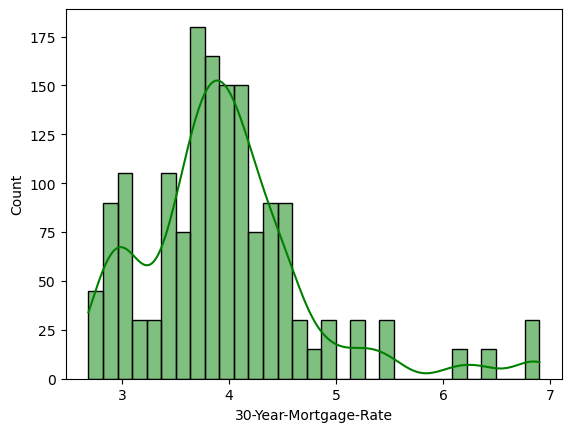

In [6]:
# Density of 30 year mortgage rate
sns.histplot(data=us_re_interest_rates, x="30-Year-Mortgage-Rate", kde=True, label="30 year rate", color="green")

<Axes: xlabel='Average Sales Price', ylabel='Count'>

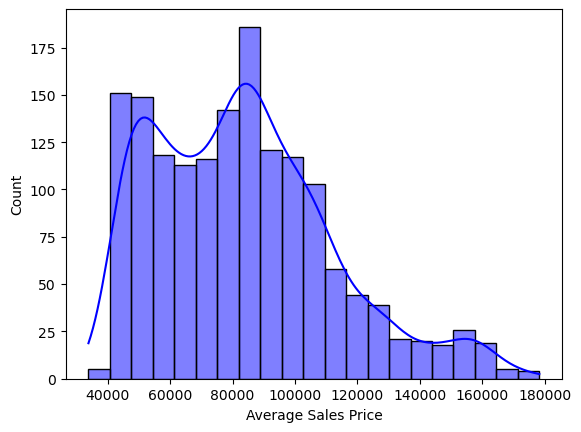

In [7]:
# Density of Average Sales Price
sns.histplot(data=us_re_interest_rates, x="Average Sales Price", kde=True, label="Average Sales Price", color="blue")

# Variables over time

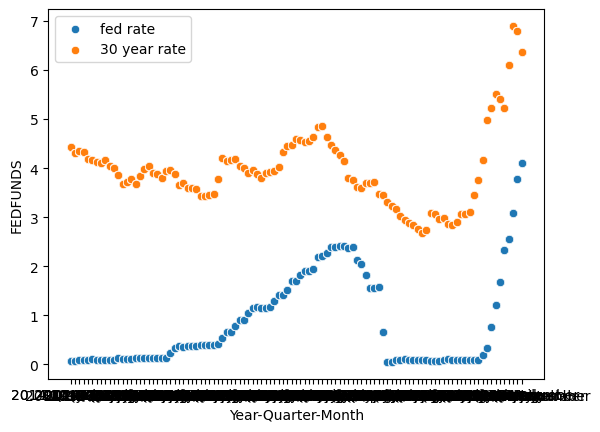

In [8]:
# Fed interest rate and 30 year interest rate over time
sns.scatterplot(data=us_re_interest_rates, x="Year-Quarter-Month", y="FEDFUNDS", label="fed rate")
sns.scatterplot(data=us_re_interest_rates, x="Year-Quarter-Month", y="30-Year-Mortgage-Rate", label="30 year rate")

plt.legend()

<Axes: xlabel='Year-Quarter-Month', ylabel='Owner-Occupied-Home-Proportion'>

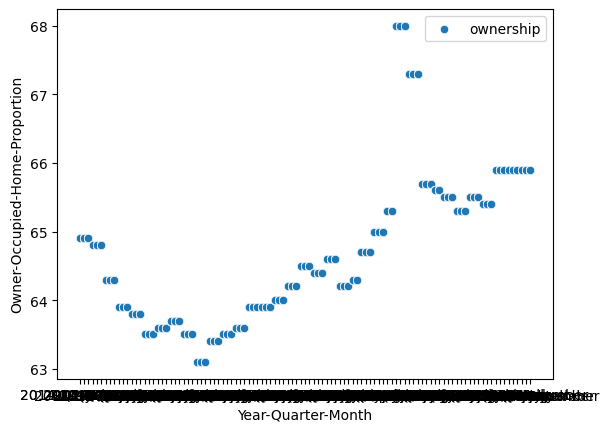

In [9]:
# Owner occupied percent over time
sns.scatterplot(data=us_re_interest_rates, x="Year-Quarter-Month", y="Owner-Occupied-Home-Proportion", label="ownership")

<Axes: xlabel='Year', ylabel='Median Income - 2022 Dollars'>

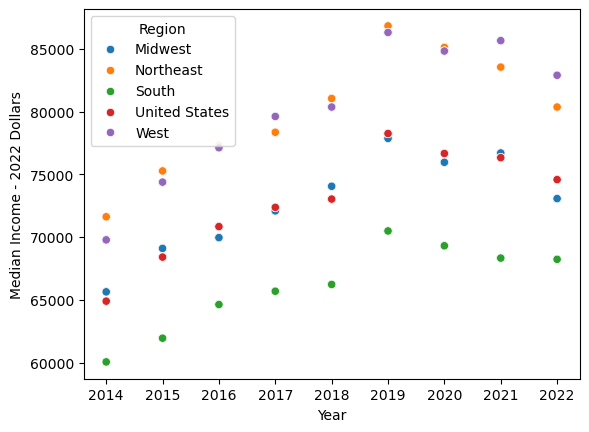

In [10]:
# Median income in 2022 dollars by region and US as a whole over time
sns.scatterplot(data=us_re_interest_rates, x="Year", y="Median Income - 2022 Dollars", hue="Region")

<Axes: xlabel='Year', ylabel='Consumer-Price-Index'>

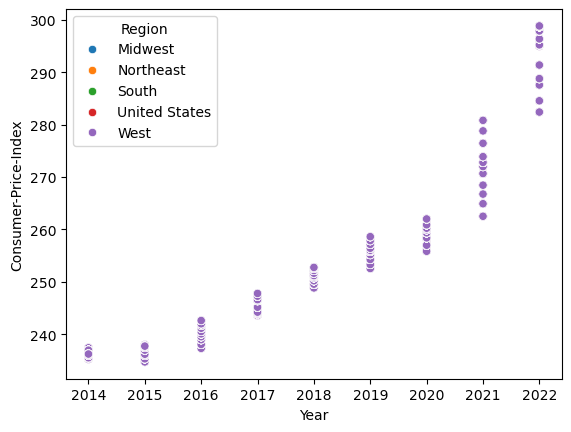

In [11]:
# Consumer price index over time
sns.scatterplot(data=us_re_interest_rates, x="Year", y="Consumer-Price-Index", hue="Region")

# Variable relationships

<Axes: xlabel='FEDFUNDS', ylabel='30-Year-Mortgage-Rate'>

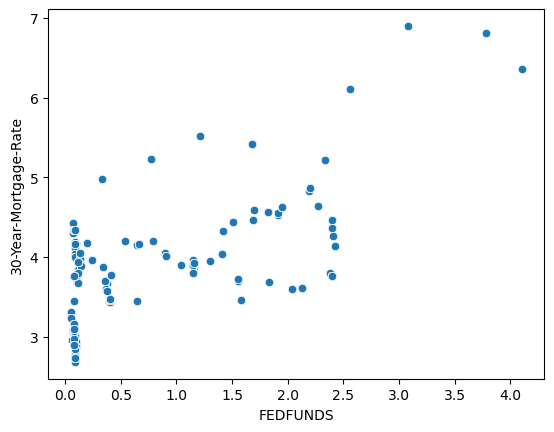

In [12]:
# Relationship between fed interest rate and 30 year mortgage rate
sns.scatterplot(data=us_re_interest_rates, x="FEDFUNDS", y="30-Year-Mortgage-Rate")

<Axes: xlabel='FEDFUNDS', ylabel='Consumer-Price-Index'>

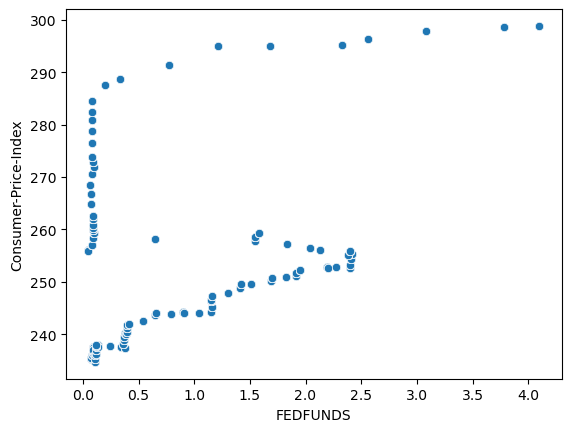

In [13]:
# Relationship between fed interest rate and consumer price index
sns.scatterplot(data=us_re_interest_rates, x="FEDFUNDS", y="Consumer-Price-Index")

<Axes: xlabel='30-Year-Mortgage-Rate', ylabel='Consumer-Price-Index'>

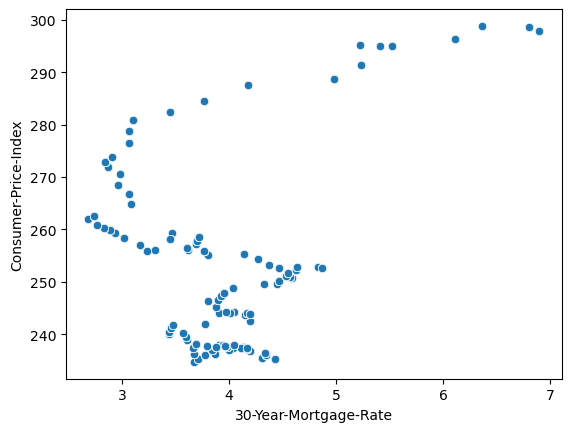

In [14]:
# Relationship between 30-Year-Mortgage-Rate and consumer price index
sns.scatterplot(data=us_re_interest_rates, x="30-Year-Mortgage-Rate", y="Consumer-Price-Index")

<Axes: xlabel='30-Year-Mortgage-Rate', ylabel='Average Sales Price'>

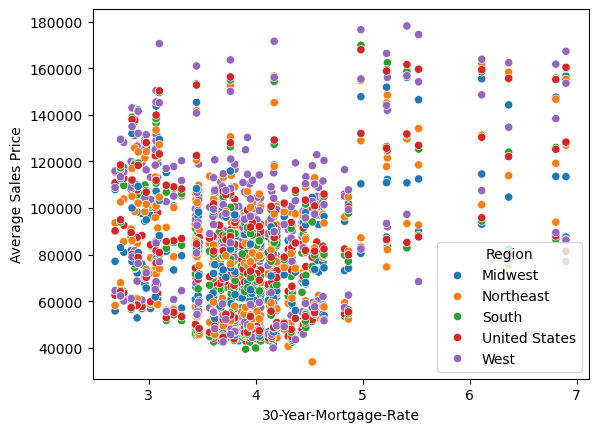

In [15]:
# Relationship between 30 year mortgage rate and average sales price
sns.scatterplot(data=us_re_interest_rates, x="30-Year-Mortgage-Rate", y="Average Sales Price", hue="Region")

<Axes: xlabel='FEDFUNDS', ylabel='Average Sales Price'>

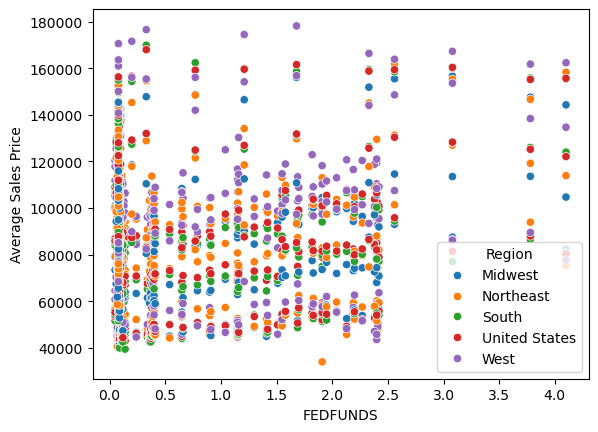

In [16]:
# Relationship between fed interest rate and average sales price
sns.scatterplot(data=us_re_interest_rates, x="FEDFUNDS", y="Average Sales Price", hue="Region")

<Axes: xlabel='Consumer-Price-Index', ylabel='Average Sales Price'>

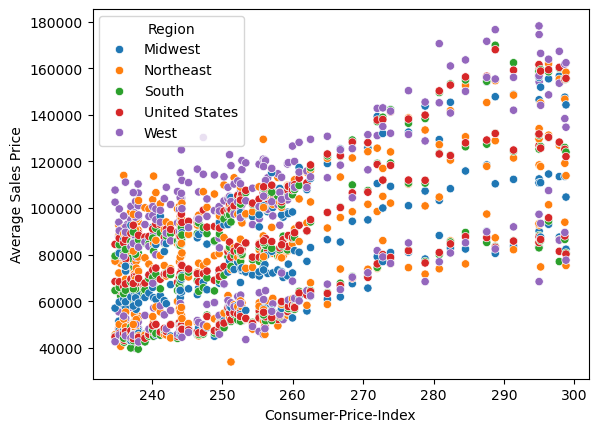

In [17]:
# Relationship between Consumer Price Index and average sales price
sns.scatterplot(data=us_re_interest_rates, x="Consumer-Price-Index", y="Average Sales Price", hue="Region")

<Axes: xlabel='Median Income - 2022 Dollars', ylabel='Average Sales Price'>

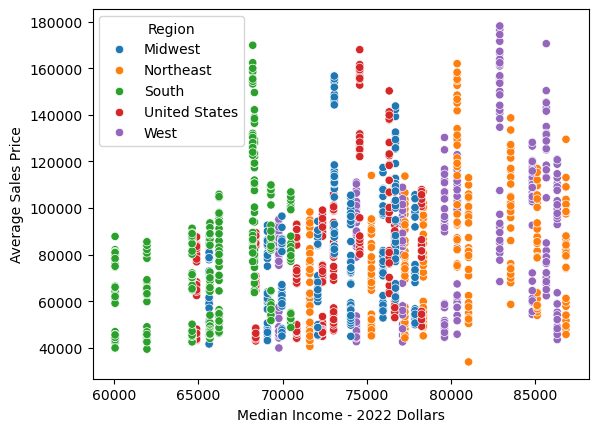

In [18]:
# Relationship between median income 2022 dollars and average sales price
sns.scatterplot(data=us_re_interest_rates, x="Median Income - 2022 Dollars", y="Average Sales Price", hue="Region")

<Axes: xlabel='Year', ylabel='Average Sales Price'>

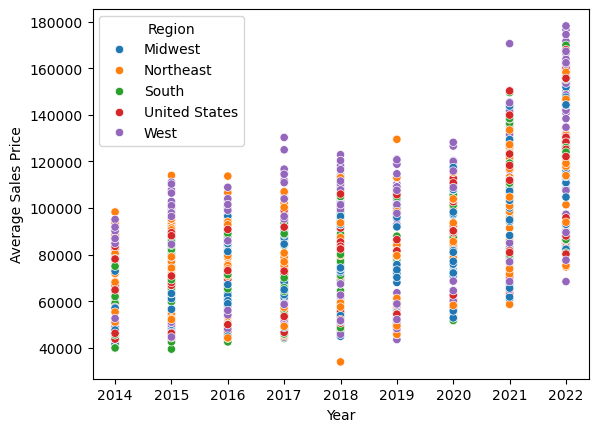

In [19]:
# Relationship between year and average sales price
sns.scatterplot(data=us_re_interest_rates, x="Year", y="Average Sales Price", hue="Region")

In [20]:
us_re_interest_rates.columns

Index(['FEDFUNDS', 'Owner-Occupied-Home-Proportion', '30-Year-Mortgage-Rate',
       'Consumer-Price-Index', 'Year', 'Month', 'Quarter', 'Region',
       'Home Size', 'Average Sales Price', 'Number of Households (Thousands)',
       'Median Income - Current Dollars', 'Median Income - 2022 Dollars',
       'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars',
       'Year-Quarter-Month'],
      dtype='object')

In [21]:
us_re_interest_rates.drop(["FEDFUNDS", "Owner-Occupied-Home-Proportion", "Year", "Month", "Quarter", "Region", "Home Size", "Number of Households (Thousands)", "Median Income - Current Dollars", "Mean Income - Current Dollars", "Year-Quarter-Month", "Mean Income - 2022 Dollars"], axis=1, inplace=True)
us_re_interest_rates.rename(columns={
    "30-Year-Mortgage-Rate": "mortgage_rate",
    "Consumer-Price-Index": "consumer_price_index",
    "Average Sales Price": "value",
    "Median Income - 2022 Dollars": "median_income"
}, inplace=True)

# reorder columns to match cali_house_prices
us_re_reordering = ["median_income", "value", "mortgage_rate", "consumer_price_index"]
us_re_interest_rates = us_re_interest_rates[us_re_reordering]

us_re_interest_rates

,median_income,value,mortgage_rate,consumer_price_index
0,65640.0,88200.0,4.432,235.288
1,65640.0,51400.0,4.432,235.288
2,65640.0,72000.0,4.432,235.288
3,71620.0,92600.0,4.432,235.288
4,71620.0,48700.0,4.432,235.288
...,...,...,...,...
1570,74580.0,80200.0,6.364,298.812
1571,74580.0,122100.0,6.364,298.812
1572,82890.0,162400.0,6.364,298.812
1573,82890.0,77600.0,6.364,298.812


In [22]:
us_cens_all = pd.read_csv("data/us_census_all_data.csv")
us_cens_all

,Label (Grouping),United States!!Owner-occupied housing units with a mortgage!!Estimate,United States!!Owner-occupied housing units with a mortgage!!Margin of Error,United States!!Percent owner-occupied housing units with a mortgage!!Estimate,United States!!Percent owner-occupied housing units with a mortgage!!Margin of Error,California!!Owner-occupied housing units with a mortgage!!Estimate,California!!Owner-occupied housing units with a mortgage!!Margin of Error,California!!Percent owner-occupied housing units with a mortgage!!Estimate,California!!Percent owner-occupied housing units with a mortgage!!Margin of Error
0,Owner-occupied housing units with a mortgage,"51,623,068","±161,811","51,623,068","±161,811","5,139,125","±29,543","5,139,125","±29,543"
1,VALUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Less than $50,000","1,355,175","±20,550",2.6%,±0.1,"84,034","±4,829",1.6%,±0.1
3,"$50,000 to $99,999","1,917,055","±27,072",3.7%,±0.1,"51,589","±3,937",1.0%,±0.1
4,"$100,000 to $299,999","16,150,351","±81,481",31.3%,±0.1,"256,178","±8,690",5.0%,±0.2
...,...,...,...,...,...,...,...,...,...
68,Less than $800,"3,878,248","±32,022",7.5%,±0.1,"133,504","±6,293",2.6%,±0.1
69,"$800 to $1,499","6,183,286","±46,900",12.0%,±0.1,"233,260","±7,311",4.5%,±0.1
70,"$1,500 or more","39,855,324","±121,803",77.2%,±0.1,"4,673,084","±28,398",90.9%,±0.2
71,No real estate taxes paid,"1,706,210","±25,166",3.3%,±0.1,"99,277","±5,002",1.9%,±0.1
